# Constant-Q transform spectral envelope coefficients (CQT-SEC)

## 01. Assumption and observations

### 01.1. Assumption

A log-spectrum, such as the CQT-spectrum, can be represented as the convolution of a pitch-invariant log-spectal envelope component (~ timbre) and a envelope-normalized pitch component.

`X = E * P`

### 01.2. Observation 1

A pitch change in the audio translates to a linear shift in the log-spectrum. 

This means that the same musical object at different pitches should have a similar envelope component but a shifted pitch component; while two different musical objects at the same pitch should have different envelope components but a similar pitch component.

- `X = E * P`

- `X2 = E2 * P2`

`=> E ~ E2`

#### Example 1: Two sinusoids at different pitches and their CQT-spectrogram

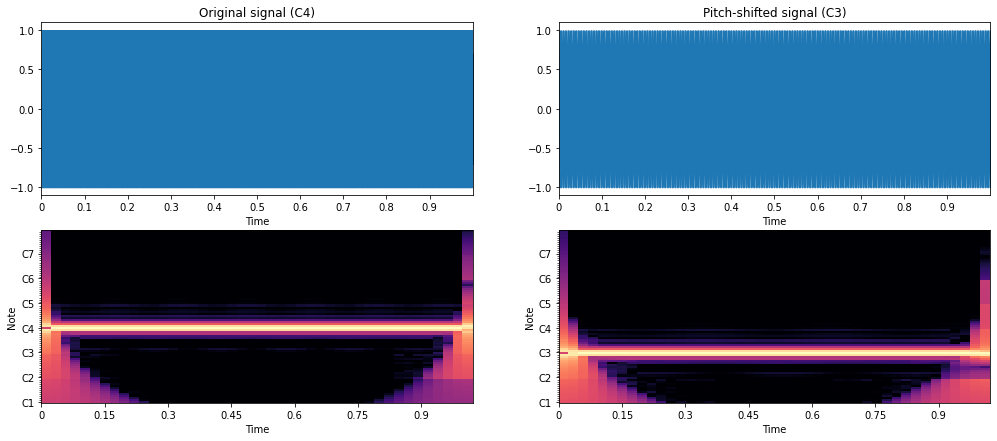

In [10]:
%matplotlib inline

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define two sinusoids, with one twice lower in frequency than the other one
sampling_frequency = 44100                                     # In Hz
time_duration = 1                                              # In seconds
time_array = np.arange(0, time_duration, 1/sampling_frequency) # In seconds
frequency_value1 = 261.63                                      # In Hz (= C4)
frequency_value2 = frequency_value1/2                          # In Hz (= C3)
audio_signal1 = np.sin(time_array*2*np.pi*frequency_value1)
audio_signal2 = np.sin(time_array*2*np.pi*frequency_value2)

# Comptute the CQT spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their waveform in seconds and their power CQT spectrogram in seconds and notes
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
librosa.display.waveplot(audio_signal1, sr=sampling_frequency)
plt.title('Original signal (C4)')
plt.subplot(2, 2, 2)
librosa.display.waveplot(audio_signal2, sr=sampling_frequency)
plt.title('Pitch-shifted signal (C3)')
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram1, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.show()

#### Example 2: Two notes at different pitches and their CQT-spectrogram

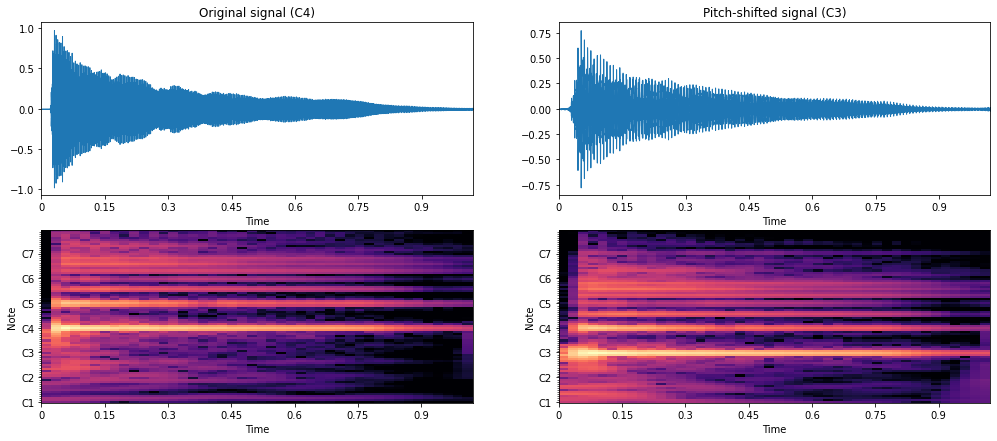

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their waveform in seconds and their power CQT spectrogram in seconds and notes
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
librosa.display.waveplot(audio_signal1, sr=sampling_frequency)
plt.title('Original signal (C4)')
plt.subplot(2, 2, 2)
librosa.display.waveplot(audio_signal2, sr=sampling_frequency)
plt.title('Pitch-shifted signal (C3)')
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram1, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.show()

### 01.3. Observation 2

The Fourier transform (FT) of a convolution of two functions is equal to the point-wise product of their FTs (convolution theorem).

- `F(X) = F(E) x F(P)`
- `F(X2) = F(E2) x F(P2)`

`=> F(E) ~ F(E2)`

#### Example: Direct vs indirect convolution

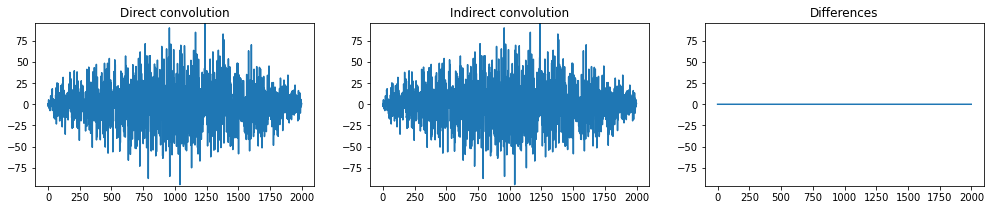

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define two arrays
number_elements = 1000
data_array1 = np.random.normal(size=number_elements)
data_array2 = np.random.normal(size=number_elements)

# Compute the direct convolution between them
data_convolution = np.convolve(data_array1, data_array2)

# Compute the convolution using the convolution theorem
ft_array1 = np.fft.fft(data_array1, 2*number_elements-1)
ft_array2 = np.fft.fft(data_array2, 2*number_elements-1)
data_convolution2 = np.real(np.fft.ifft(ft_array1*ft_array2))

# Display the convolutions and their differences
maximum_value = max(abs(data_convolution))
plt.figure(figsize=(17, 3))
plt.subplot(1, 3, 1)
plt.plot(data_convolution), plt.ylim(-maximum_value, maximum_value), plt.title('Direct convolution')
plt.subplot(1, 3, 2)
plt.plot(data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title('Indirect convolution')
plt.subplot(1, 3, 3)
plt.plot(data_convolution-data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title('Differences')
plt.show()

### 01.4. Observation 3

The magnitude FT is shift-invariant.

- `F(X) = abs(F(X)) x exp(j*angle(F(X)))`

- `F(X2) = abs(F(X2)) x exp(j*angle(F(X2)))`

`=> abs(F(X)) ~ abs(F(X2))`

Conclusion:

`=> F(E) ~ abs(F(X)) => E ~ F-1(abs(F(X))) and P ~ F-1(exp(j*angle(F(X))))`

#### Example 1: An array and a shifted version of it, and their magnitude FT

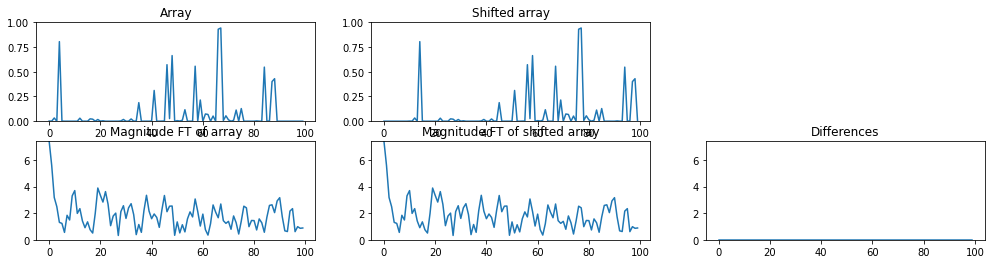

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define a non-negative array and a shifted version of it
number_elements = 100
delay_size = 10
data_array1 = np.concatenate((np.power(np.random.rand(number_elements-delay_size), 10), np.zeros(delay_size)))
data_array2 = np.concatenate((np.zeros(delay_size), data_array1[0:number_elements-delay_size]))

# Compute the magnitude FT of the arrays
absft_array1 = abs(np.fft.fft(data_array1, 2*number_elements-1))[0:number_elements]
absft_array2 = abs(np.fft.fft(data_array2, 2*number_elements-1))[0:number_elements]

# Display the arrays and magnitude FTs
maximum_value = max(np.max(absft_array1), np.max(absft_array2))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(data_array1), plt.ylim(0, 1), plt.title('Array')
plt.subplot(2, 3, 2), plt.plot(data_array2), plt.ylim(0, 1), plt.title('Shifted array')
plt.subplot(2, 3, 4), plt.plot(absft_array1), plt.ylim(0, maximum_value), plt.title('Magnitude FT of array')
plt.subplot(2, 3, 5), plt.plot(absft_array2), plt.ylim(0, maximum_value), plt.title('Magnitude FT of shifted array')
plt.subplot(2, 3, 6), plt.plot(abs(absft_array1-absft_array2)), plt.ylim(0, maximum_value), plt.title('Differences')
plt.show()

#### Example 2: A CQT spectrum and a pitch-shifted version of it, and their magnitude FT

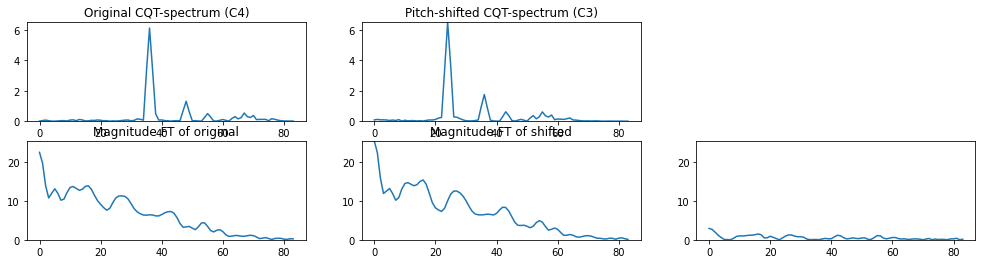

In [31]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT-spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))
number_frequencies = np.shape(audio_spectrogram1)[0]

# Compute the magnitude FT of the CQT-spectrograms
absft_spectrogram1 = abs(np.fft.fft(audio_spectrogram1, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]
absft_spectrogram2 = abs(np.fft.fft(audio_spectrogram2, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]

# Display their waveform in seconds and their power CQT-spectrogram in seconds and notes
i = 10
audio_maximum = max(np.max(abs(audio_spectrogram1[:, i])), np.max(abs(audio_spectrogram2[:, i])))
absft_maximum = max(np.max(abs(absft_spectrogram1[:, i])), np.max(abs(absft_spectrogram2[:, i])))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(audio_spectrogram1[:, i]), plt.ylim(0, audio_maximum), plt.title('Original CQT-spectrum (C4)')
plt.subplot(2, 3, 2), plt.plot(audio_spectrogram2[:, i]), plt.ylim(0, audio_maximum), plt.title('Pitch-shifted CQT-spectrum (C3)')
plt.subplot(2, 3, 4), plt.plot(absft_spectrogram1[:, i]), plt.ylim(0, absft_maximum), plt.title('Magnitude FT of original')
plt.subplot(2, 3, 5), plt.plot(absft_spectrogram2[:, i]), plt.ylim(0, absft_maximum), plt.title('Magnitude FT of shifted')
plt.subplot(2, 3, 6), plt.plot(abs(absft_spectrogram1[:, i]-absft_spectrogram2[:, i])), plt.ylim(0, absft_maximum)
plt.show()

## 02. Compare librosa's and zaf's CQT-spectrogram and MFCC

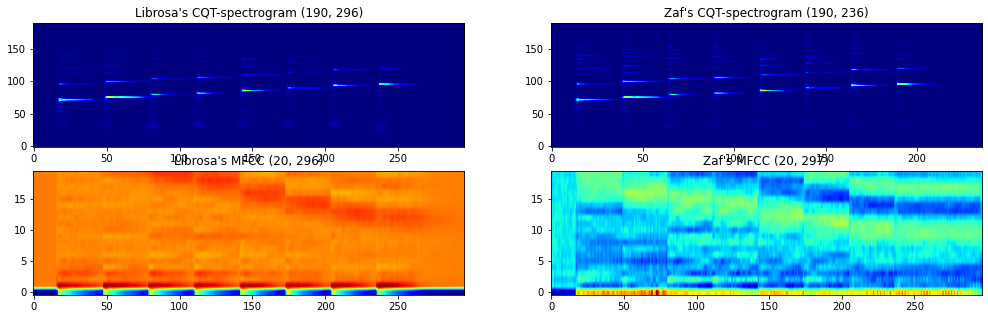

In [33]:
import numpy as np
import librosa
import zaf
import scipy.signal
import matplotlib.pyplot as plt

# Load an audio file in mono
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
sampling_frequency = 16000
audio_signal, sampling_frequency = librosa.load(file_path, sr=sampling_frequency, mono=True)

# Define some parameters
window_length = pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency))))
step_length = int(window_length/2)
window_function = scipy.signal.hamming(window_length, sym=False)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/2
octave_resolution = 24
time_resolution = 25
number_mels = 40
number_coefficients = 20

# Compute the CQT-spectrogram using librosa and zaf
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                     fmin=minimum_frequency, n_bins=number_frequencies, bins_per_octave=octave_resolution))
cqt_kernel = zaf.cqtkernel(sampling_frequency, octave_resolution, minimum_frequency, maximum_frequency)
cqt_spectrogram2 = zaf.cqtspectrogram(audio_signal, sampling_frequency, time_resolution, cqt_kernel)

# Compute the MFCCs using librosa and zaf
audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_mfcc=number_coefficients, \
                                  hop_length=step_length)
mel_filterbank = zaf.melfilterbank(sampling_frequency, window_length, number_mels)
audio_mfcc2 = zaf.mfcc(audio_signal, window_function, step_length, mel_filterbank, number_coefficients)

# Display the CQT-spectrograms and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(2, 2, 1)
plt.imshow(cqt_spectrogram, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Librosa's CQT-spectrogram {np.shape(cqt_spectrogram)}")
plt.subplot(2, 2, 2)
plt.imshow(cqt_spectrogram2, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Zaf's CQT spectrogram {np.shape(cqt_spectrogram2)}")
plt.subplot(2, 2, 3)
plt.imshow(audio_mfcc, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Librosa's MFCC {np.shape(audio_mfcc)}")
plt.subplot(2, 2, 4)
plt.imshow(audio_mfcc2, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Zaf's MFCC {np.shape(audio_mfcc2)}")
plt.show()

## 03. Test decomposing the CQT-spectrogram into a CQT-envelope and CQT-pitch

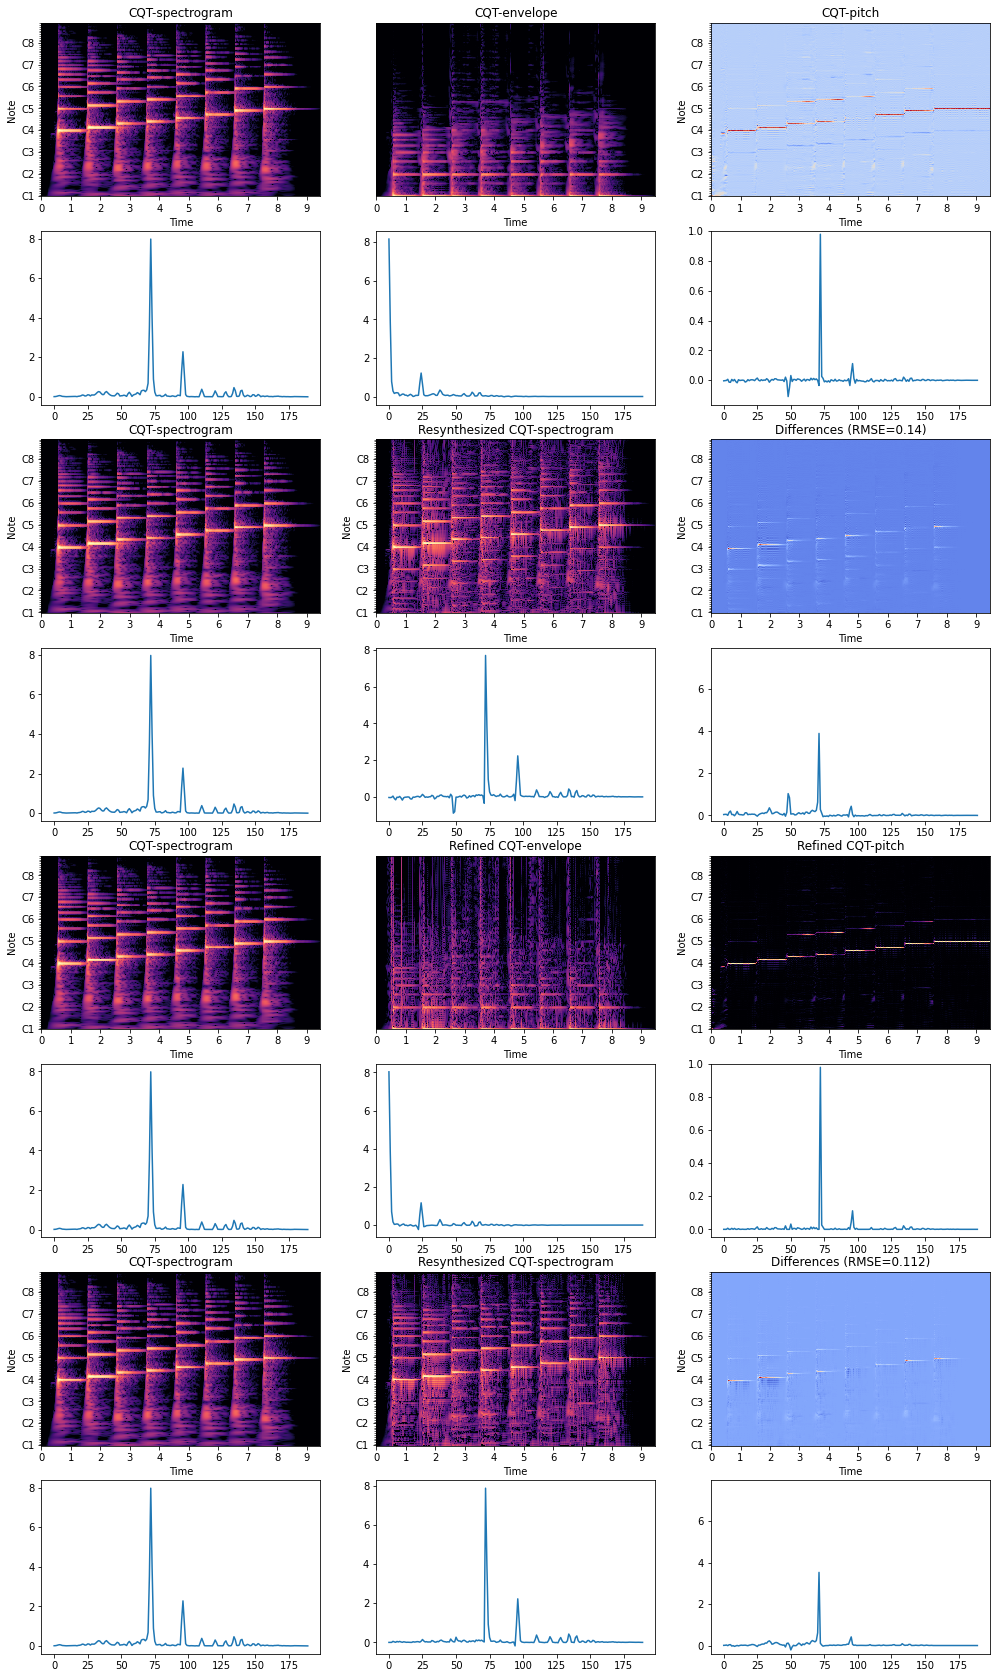

In [43]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)

# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
# file_path = r'557469__oleviolin__d-scale-violin.wav'
sampling_frequency = 16000
audio_signal, _ = librosa.load(file_path, sr=sampling_frequency, mono=True)

# Comptute the CQT-spectrogram of the signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/2
octave_resolution = 24
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
audio_cqt = librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                        n_bins=number_frequencies, bins_per_octave=octave_resolution)
cqt_spectrogram = np.abs(audio_cqt)
number_times = np.shape(cqt_spectrogram)[1]

# Derive the CQT-envelope and the CQT-pitch
ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
absftcqt_spectrogram = abs(ftcqt_spectrogram)
cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/absftcqt_spectrogram, axis=0)[0:number_frequencies, :])

# Resynthesize the spectrogram by convolving the CQT-envelope and CQT-pitch
cqt_spectrogram2 = np.zeros((number_frequencies, number_times))
for i in range(number_times):
    cqt_spectrogram2[:, i] = np.convolve(cqt_envelope[:, i], cqt_pitch[:, i])[0:number_frequencies]

# Display the CQT-spectrogram, CQT-envelope and CQT-pitch, the resynthesized CQT-spectrogram, and the differences
j = 20
plt.figure(figsize=(17, 30))
plt.subplot(8, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title('CQT-envelope')
plt.subplot(8, 3, 3)
librosa.display.specshow(cqt_pitch, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title('CQT-pitch')
plt.subplot(8, 3, 4)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 5)
plt.plot(cqt_envelope[:, j])
plt.subplot(8, 3, 6)
plt.plot(cqt_pitch[:, j])
plt.ylim(top=1)
plt.subplot(8, 3, 7)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 8)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('Resynthesized CQT-spectrogram')
plt.subplot(8, 3, 9)
librosa.display.specshow(cqt_spectrogram-cqt_spectrogram2, sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
rmse_value = np.round(np.sqrt(np.mean(np.power(cqt_spectrogram-cqt_spectrogram2, 2))), 3)
plt.title(f'Differences (RMSE={rmse_value})')
plt.subplot(8, 3, 10)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 11)
plt.plot(cqt_spectrogram2[:, j])
plt.subplot(8, 3, 12)
plt.plot(cqt_spectrogram[:, j]-cqt_spectrogram2[:, j])
plt.ylim(top=max(cqt_spectrogram[:, j]))

# Refine the CQT-pitch, and then the CQT-envelope
cqt_pitch2 = np.copy(cqt_pitch)
cqt_pitch2[cqt_pitch2 < 0] = 0
cqt_envelope2 = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch2, 2*number_frequencies-1, axis=0)+1e-7), \
                                    axis=0)[0:number_frequencies, :])

# Resynthesize the spectrogram by convolving the refined CQT-envelope and CQT-pitch
cqt_spectrogram2 = np.zeros((number_frequencies, number_times))
for i in range(number_times):
    cqt_spectrogram2[:, i] = np.convolve(cqt_envelope2[:, i], cqt_pitch2[:, i])[0:number_frequencies]

# Display the CQT-spectrogram, the refined CQT-envelope and CQT-pitch, the resynthesized CQT-spectrogram, and the differences
plt.subplot(8, 3, 13)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 14)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title('Refined CQT-envelope')
plt.subplot(8, 3, 15)
librosa.display.specshow(cqt_pitch2, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title('Refined CQT-pitch')
plt.subplot(8, 3, 16)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 17)
plt.plot(cqt_envelope2[:, j])
plt.subplot(8, 3, 18)
plt.plot(cqt_pitch2[:, j])
plt.ylim(top=1)
plt.subplot(8, 3, 19)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 20)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('Resynthesized CQT-spectrogram')
plt.subplot(8, 3, 21)
librosa.display.specshow(cqt_spectrogram-cqt_spectrogram2, sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
rmse_value = np.round(np.sqrt(np.mean(np.power(cqt_spectrogram-cqt_spectrogram2, 2))), 3)
plt.title(f'Differences (RMSE={rmse_value})')
plt.subplot(8, 3, 22)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 23)
plt.plot(cqt_spectrogram2[:, j])
plt.subplot(8, 3, 24)
plt.plot(cqt_spectrogram[:, j]-cqt_spectrogram2[:, j])
plt.ylim(top=max(cqt_spectrogram[:, j]))
plt.show()

# # Resynthesize the signal
# audio_signal2 = librosa.icqt(cqt_spectrogram2*audio_cqt/cqt_spectrogram, sr=sampling_frequency, \
#                              hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
# audio_signal2 = np.max(abs(audio_signal))*audio_signal2/np.max(abs(audio_signal2))
# audio_signal2 = np.pad(audio_signal2, (0, len(audio_signal)-len(audio_signal2)), 'constant', constant_values=0)

## 04. Test extracting the CQT-spectral envelope coefficients (CQT-SEC)

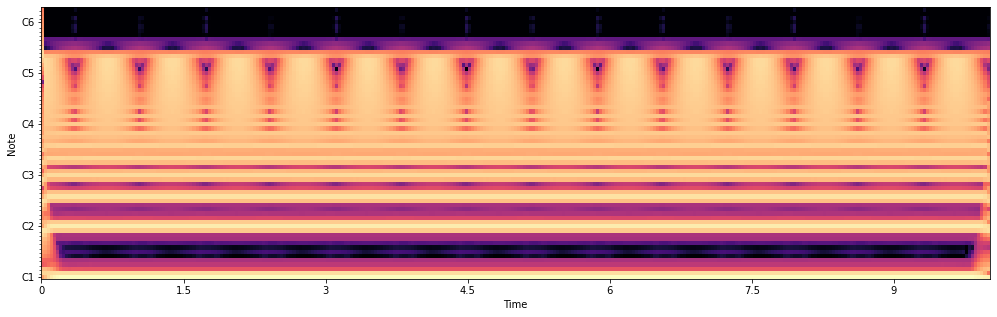

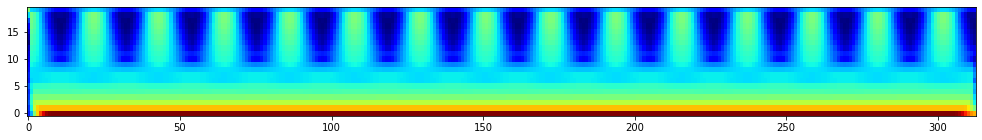

In [47]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)

# Build a harmonic signal
sampling_frequency = 16000                                     # In Hz
time_duration = 10                                             # In seconds
time_array = np.arange(0, time_duration, 1/sampling_frequency) # In seconds
number_harmonics = 20
frequency_values = 32.70*np.arange(1, number_harmonics+1)      # in Hz
number_samples = len(time_array)
audio_signal = np.zeros(number_samples)
for frequency_value in frequency_values:
    audio_signal = audio_signal+np.sin(time_array*2*np.pi*frequency_value)

# Comptute the CQT-spectrogram of the harmonic signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = frequency_values[0]
maximum_frequency = 2*frequency_values[-1]
octave_resolution = 12
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                                     n_bins=number_frequencies, bins_per_octave=octave_resolution))
plt.figure(figsize=(17, 5))
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.show()

# Extract the harmonic coefficients
coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_harmonics+1))).astype(int)
cqt_sec = cqt_spectrogram[coefficient_indices, :]
plt.figure(figsize=(17, 2))
plt.imshow(cqt_sec, aspect='auto', cmap='jet', origin='lower')
plt.show()

## 04. Compare CQT-SEC to MFCC

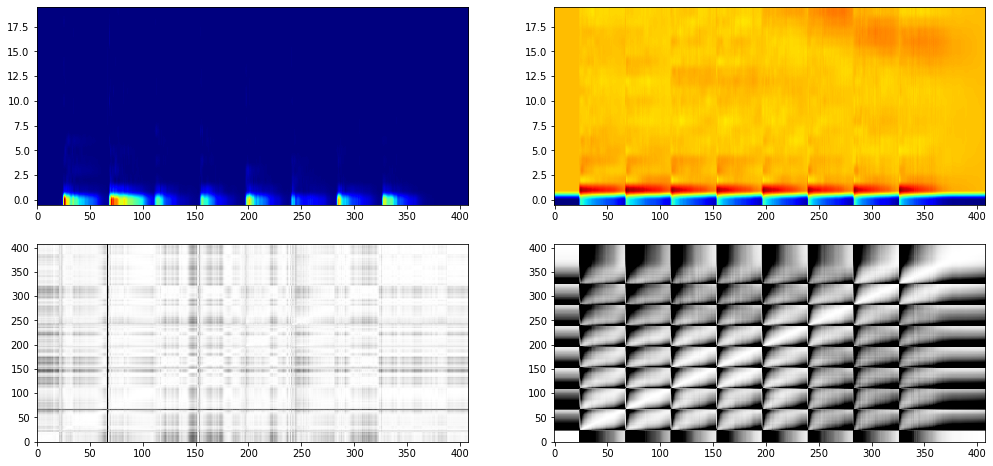

In [12]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define a function to compute the CQT spectral envelope coefficients (CQT-SEC)
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                         fmin=minimum_frequency, n_bins=number_frequencies, \
                                         bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-6), \
                                       axis=0)[0:number_frequencies, :])
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]
    cqt_sec[cqt_sec<0] = 0

    return cqt_sec


# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Define a function to compute a self-similarity matrix using the cosine similarity
def ssm(audio_feature):
    
    # Normalize the columns by their Euclidean norm
    audio_feature0 = audio_feature/(np.sqrt(np.sum(np.power(audio_feature, 2), axis=0))+1e-16)
    
    # Multiple the normalized columns with each other
    similarity_matrix = np.matmul(audio_feature0.T, audio_feature0)
    
    return similarity_matrix
    
    
# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
# file_path = r'557469__oleviolin__d-scale-violin.wav'
sampling_frequency = 16000
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
# Compute the CQT-SECs and the MFCCs
cqt_sec = cqtsec(audio_signal, sampling_frequency)
audio_mfcc = mfcc(audio_signal, sampling_frequency)

# Compute the self-similarity matrices using the cosine similarity
similarity_matrix = ssm(cqt_sec)
similarity_matrix2 = ssm(audio_mfcc)

# Display everything
plt.figure(figsize=(17, 8))
plt.subplot(2, 2, 1)
plt.imshow(cqt_sec, cmap='jet', aspect='auto', origin='lower')
plt.subplot(2, 2, 2)
plt.imshow(audio_mfcc, cmap='jet', aspect='auto', origin='lower')
plt.subplot(2, 2, 3)
plt.imshow(similarity_matrix, cmap='gray', aspect='auto', origin='lower', vmin=0.9, vmax=1)
plt.subplot(2, 2, 4)
plt.imshow(similarity_matrix2, cmap='gray', aspect='auto', origin='lower', vmin=0.9, vmax=1)
plt.show()

## 04. Compare CQT-SECs and MFCCs on a small dataset

In [105]:
# import os
# from shutil import copyfile

# # Create a small dataset from the large NSynth dataset
# folder_path = r'C:\Users\zarafii2001\Gracenote\Data\nsynth\nsynth-train\audio'
# folder_path2 = r'C:\Users\zarafii2001\Documents\GitHub\PILSE-Python\nsynth11'
# instrument_list = [{'name':'bass_acoustic', 'number': '000', 'midi': 24}, \
#                    {'name':'brass_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'flute_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'guitar_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'keyboard_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'mallet_acoustic', 'number': '000', 'midi': 72}, \
#                    {'name':'organ_electronic', 'number': '000', 'midi': 60}, \
#                    {'name':'reed_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'string_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'synth_lead_synthetic', 'number': '000', 'midi': 60}, \
#                    {'name':'vocal_acoustic', 'number': '002', 'midi': 60}]
# number_semitones = 12
# for i in instrument_list:
#     for j in range(i['midi'], i['midi']+number_semitones):
#         file_name = f'{i['name']}_{i['number']}-{j:03d}-075.wav'
#         file_path = os.path.join(folder_path, file_name)
#         file_path2 = os.path.join(folder_path2, file_name)
#         copyfile(file_path, file_path2)

In [3]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Derive the CQT-envelope and the CQT-pitch
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]


    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\PILSE-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)

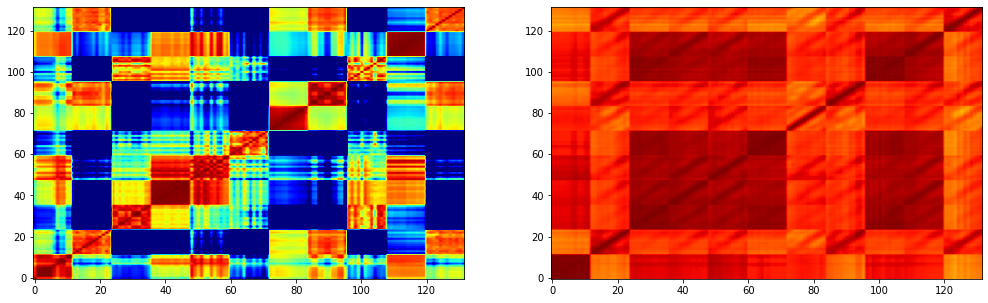

In [61]:
# Initialize the similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current row and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current column and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity matrices for the CQT-SECs and MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Display the similarity matrices for the CQT-SECs and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.subplot(1, 2, 2)
plt.imshow(mfcc_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.show()

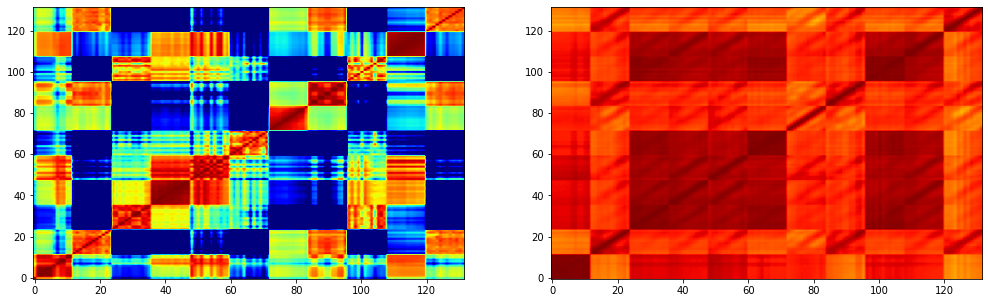

In [63]:
# Initialize the similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current row and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current column and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity matrices for the CQT-SECs and MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Display the similarity matrices for the CQT-SECs and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.subplot(1, 2, 2)
plt.imshow(mfcc_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.show()

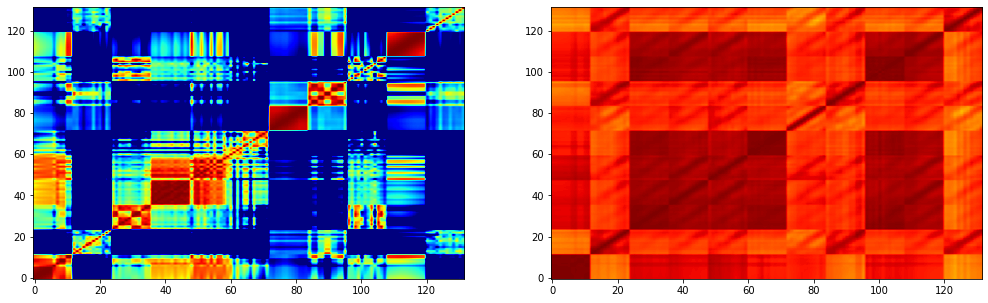

In [4]:
# Initialize the similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current row and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current column and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity matrices for the CQT-SECs and MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Display the similarity matrices for the CQT-SECs and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.subplot(1, 2, 2)
plt.imshow(mfcc_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.show()